![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Clustering II. Sesión Sincrónica.


Tanto Clustering como PCA y SVD buscan simplificar los datos de forma no supervizada, pero sus mecanismos son diferentes:

- PCA y SVD buscan encontrar una representación de baja dimensión de las observaciones que explique una buena fracción de la varianza;

- Clustering busca encontrar subgrupos homogéneos entre las observaciones.


El objetivo de este cuaderno es introducir los algoritmos que serán estudiados en la semana 4.

**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.



# Introducción

## ¿Qué es el análisis de clusters?

El análisis de clusters es una de las principales aplicaciones de los algoritmos de aprendizaje no supervisado. Este tipo de análisis se utiliza para juntar observaciones similares en grupos:


![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/plot_clustering_notebook.png)


## Caveat

Los métodos de clustering son exploratorios: se pueden utilizar para evaluar la calidad de los datos y generar hipótesis.

Pero no importa lo que entre en el algoritmo de agrupamiento, los clusters salen. Esta es una situación clásica de "basura que entra, basura que sale".


La conclusión es que la agrupación es buena si es útil para responder el problema en particular. Pero, esto es difícil de evaluar, a pesar de tener ciertas medidas de validez interna. Esto requiere que el usuario utilice su capacidad y discernimiento.


## Etapas

Las etapas del análisis de clusters podemos resumirlas de la siguiente forma:

1. Iniciamos con una matriz de datos

    \begin{align}
X_{n\times k}=\left(\begin{array}{cccc}
x_{11} &  & \dots & x_{1k}\\
\\
\vdots &  & x_{ik} & \vdots\\
\\
x_{n1} &  & \dots & x_{nk}
\end{array}\right)
    \end{align}

2. Calculamos la matriz de distancia o disimilitud

\begin{align}
D_{n\times n}=\left(\begin{array}{ccccc}
d_{11} &  & \dots &  & d_{1n}\\
 & \ddots\\
\vdots &  & d_{jj} &  & \vdots\\
 &  &  & \ddots\\
d_{n1} &  & \dots &  & d_{nn}
\end{array}\right)
\end{align}


3. Aplicamos el algoritmo de clustering. Existen varios tipos
    - **basados en centroides**
    - **basados en conectividad**
    - **basados en densidades**
    


## Distancias

Ejemplo 1: Calcular el parecido entre tres alumnos/as  a partir de sus notas usando la distancia euclideana:

In [2]:
import pandas as pd
import numpy as np

A= pd.DataFrame(np.array([[3,5,2,4], [1, 0, 3, 5], [9, 10, 2, 5]]))
A

,0,1,2,3
0,3,5,2,4
1,1,0,3,5
2,9,10,2,5


Distancia Euclideana:



\begin{equation}
d_{02} = \sqrt{(3−9)^2 +(5−10)^2 +(2−2)^2 +(4−5)^2} =7,87 \\
d_{12} = \sqrt{(1−9)^2 +(0−10)^2 +(3−2)^2 +(5−5)^2} =12,85  \\
d_{01} = \sqrt{(3−1)^2 +(5−0)^2  +(2−3)^2 +(4−5)^2} =5,57
\end{equation}



In [3]:
import math
math.sqrt((3-9)**2 +(5-10)**2 +(2-2)**2 +(4-5)**2 )

7.874007874011811

In [4]:
math.sqrt((1-9)**2 +(0-10)**2 +(3-2)**2 +(5-5)**2 )

12.84523257866513

In [5]:
math.sqrt((3-1)**2 +(5-0)**2  +(2-3)**2 +(4-5)**2 )

5.5677643628300215

In [6]:
from scipy.spatial import distance_matrix

# Creamos la matriz de distancias escogiendo p = 2, el cual convierte
# la distancia Minkowski en la distancia euclidiana
pd.DataFrame(distance_matrix(A, A, p = 2))

,0,1,2
0,0.000000,5.567764,7.874008
1,5.567764,0.000000,12.845233
2,7.874008,12.845233,0.000000


- Un problema de la distancia euclídiana, como medida de similaridad, es su dependencia de las diferentes escalas en que estén medidas las variables.

- Escalas y rangos de variación diferentes pueden afectar al análisis de clusters.

- Este problema se soluciona si en vez de calcular la distancia euclídea con puntuaciones directas se calcula con puntuaciones normalizadas.

- Estandarizar las puntuaciones de los sujetos en las variables es uno de los procedimientos de normalización más frecuentes en análisis de datos.

EJEMPLO 2. Supongamos que estamos interesados en agrupar a una muestra de 5 familias en base al número de hijos, al
sueldo en euros al mes y al tamaño de la casa en metros cuadrados. La matriz de datos de la que partimos es:

In [7]:
B= pd.DataFrame(np.array([[1,723,60], [1, 900, 60], [4,800,80], [0,1205,50], [2,600,65]]))
B.columns = ['Hijos','Salario','Metros2']
B

,Hijos,Salario,Metros2
0,1,723,60
1,1,900,60
2,4,800,80
3,0,1205,50
4,2,600,65


Podemos como antes calcular las distancias entre los sujetos a partir de las puntuaciones directas o bien podemos calcularlas a partir de las variables estandarizadas.

In [8]:
pd.DataFrame(distance_matrix(B, B, p = 2))

,0,1,2,3,4
0,0.000000,177.000000,79.611557,482.104760,123.105646
1,177.000000,0.000000,102.024507,305.165529,300.043330
2,79.611557,102.024507,0.000000,406.129290,200.571683
3,482.104760,305.165529,406.129290,0.000000,605.189227
4,123.105646,300.043330,200.571683,605.189227,0.000000


Como puede observarse, las familias más parecidas son la familia primera y la tercera. Sin embargo, son familias que salvo en que tienen un salario similar son diferentes en el resto de las variables. Si por el contrario seleccionamos la opción estandarizar
la matriz de distancias que obtenemos es:

In [9]:
from sklearn.preprocessing import scale

pd.DataFrame(distance_matrix(scale(B), scale(B), p = 2))

,0,1,2,3,4
0,0.000000,0.864584,3.033057,2.669898,1.079292
1,0.864584,0.000000,3.049028,1.950566,1.717929
2,3.033057,3.049028,0.000000,4.688738,2.339243
3,2.669898,1.950566,4.688738,0.000000,3.640187
4,1.079292,1.717929,2.339243,3.640187,0.000000


- Con las puntuaciones estandarizadas las familias más parecidas son la primera y la segunda.

- Es evidente que los resultados de un análisis de clusters son distintos si se parte de matrices de similaridad o distancia que ordenen a los sujetos de manera distinta.

- Es por ello que en caso de variables medidas en escalas distintas es necesario normalizar.

EJEMPLO 3.  Supongamos que queremos agrupar a los sujetos de una muestra (N = 5) en
función de su parecido en un conjunto de variables todas ellas dicotómicas:
- Estado civil: soltero(1)-casado(0)
- Situación laboral: ocupado(1)-desocupado(0)
- Nivel de estudios: bajo(1)-alto(0)
- Creencias religiosa: creyente(1)-no creyente(0)
- Tendencia de voto en las últimas elecciones: izquierda(1)-derecha(0).

La matriz de datos de la que partimos es

In [10]:
C= pd.DataFrame(np.array([[1,1,0,1,0], [1,1,1,0,0], [0,0,0,1,1], [0,0,0,0,1], [1,0,0,1,0]]))
C.columns = ['Soltero','Ocupado','Baja_educacion', 'Creyente', "Izquierda"]
C

,Soltero,Ocupado,Baja_educacion,Creyente,Izquierda
0,1,1,0,1,0
1,1,1,1,0,0
2,0,0,0,1,1
3,0,0,0,0,1
4,1,0,0,1,0


 La medida de distancia más utilizada en estos casos se conoce como distancia de coincidencia simple:


\begin{align}
d_{ii'}=d(x_i,x_{i'})= I(x_i \neq x_{i'})
\end{align}

donde $I(.)$ es la función indicadora que toma valor 1 cuando las variables no coinciden, y 0 en caso contrario.

In [11]:
C.iloc[:,0:1]

,Soltero
0,1
1,1
2,0
3,0
4,1


In [12]:
from sklearn.metrics import DistanceMetric

DistanceMetric.get_metric('matching').pairwise(C.iloc[:,0:1])

array([[0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

In [13]:
DistanceMetric.get_metric('matching').pairwise(C)

array([[0. , 0.4, 0.6, 0.8, 0.2],
       [0.4, 0. , 1. , 0.8, 0.6],
       [0.6, 1. , 0. , 0.2, 0.4],
       [0.8, 0.8, 0.2, 0. , 0.6],
       [0.2, 0.6, 0.4, 0.6, 0. ]])

EJEMPLO 4. Supongamos que tenemos los siguientes datos

In [14]:
import pandas as pd

# Creamos un diccionario
dictionary = {"Edad": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90],
              "Genero": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"],
              "Estado_Civil": ["Soltero", "Soltero", "Soltero", "Casado", "Casado", "Soltero", "Casado", "Divorciado", "Casado", "Divorciado"],
              "Salario": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000],
              "tiene_hijos": [False, False, False, True, True, False, False, False, False, True],
              "Volumen_compras": ["Bajo", "Bajo", "Bajo", "Alto", "Alto", "Bajo", "Medio", "Medio", "Medio", "Bajo"]}

# Creamos un Pandas DataFrame
D = pd.DataFrame.from_dict(dictionary)
D

,Edad,Genero,Estado_Civil,Salario,tiene_hijos,Volumen_compras
0,22,M,Soltero,18000,False,Bajo
1,25,M,Soltero,23000,False,Bajo
2,30,F,Soltero,27000,False,Bajo
3,38,F,Casado,32000,True,Alto
4,42,F,Casado,34000,True,Alto
5,47,M,Soltero,20000,False,Bajo
6,55,M,Casado,40000,False,Medio
7,62,M,Divorciado,42000,False,Medio
8,61,M,Casado,25000,False,Medio
9,90,M,Divorciado,70000,True,Bajo


Distancia de Gower

- Para una característica numérica, la diferencia parcial entre dos clientes i y j es la resta entre sus valores en la característica específica (en valor absoluto) dividida por el rango total de la característica. El rango de salario es 52000 (70000–18000) mientras que el rango de edad es 68 (90–22).
    Note, hay que tener en cuenta si existen outliers o valores atípicos. Un valor erróneo extremadamente grande o pequeño afectaría directamente el rango y, por lo tanto, las diferencias en esa característica, distorsionando su importancia.

-    Para una característica categórica, la diferencia parcial entre dos clientes es uno cuando ambos clientes tienen un valor diferente para esta característica. Cero en caso contrario.
  

In [15]:
D.iloc[0:2,:]

,Edad,Genero,Estado_Civil,Salario,tiene_hijos,Volumen_compras
0,22,M,Soltero,18000,False,Bajo
1,25,M,Soltero,23000,False,Bajo


In [16]:
D.iloc[:,0].max()-D.iloc[:,0].min()

68

In [17]:
abs(22-25)/68

0.04411764705882353

In [18]:
D.iloc[:,3].max()-D.iloc[:,3].min()

52000

In [19]:
abs(18000-23000)/52000

0.09615384615384616

La Disimilitud de Gower entre ambos clientes es el promedio de disimilitudes parciales a lo largo de las diferentes características:

\begin{align}
\frac{(0,044118 + 0 + 0 + 0,096154 + 0 + 0)}{ 6} = 0,023379.
\end{align}

Como el valor es cercano a cero, podemos decir que ambos clientes son muy similares.

In [20]:
# pip install gower

In [21]:
import gower

distance_matrix = gower.gower_matrix(D)
pd.DataFrame(distance_matrix)

ModuleNotFoundError: No module named 'gower'

## Clustering Jerárquico

- Comenzamos con el clustering jerárquico ya que este método es especialmente útil cuando no existen expectativas sobre los patrones y estructuras subyacentes de los datos.


- Una característica atractiva es que no es necesario especificar el número de clusers a buscar a priori como en   k-medias


- Este  mide la conectividad entre las observaciones en algún espacio de características o conjunto de datos.


- Podemos usar los resultados para visualizar su similitud espacial entre sí en una variedad de niveles, típicamente en forma de dendrograma, que es una estructura similar a un árbol que muestra progresivamente las similitudes entre las observaciones.


- En algunos casos puede informar a los otros métodos de clustering  basados en los patrones revelados. Por ejemplo, si el dendrograma revela dos grupos naturales, entonces una segunda etapa puede inicializar un algoritmo de k-medias con dos conglomerados. Al especificar el algoritmo de k-medias, podríamos comparar directamente la validez interna de ambos algoritmos  para determinar cuál es mejor para agrupar los datos a lo largo de una variedad de dimensiones (p. ej., conectividad, compacidad, etc.).


- Hay dos tipos de agrupamiento jerárquico:
    -  aglomerativo (de abajo hacia arriba) y
    -  divisivo (de arriba hacia abajo).


### Enlaces

- Los algoritmos de clustering jerárquico son únicos en el sentido de que requieren especificar:

    - una medida de distancia (al igual que los otros algoritmos  aquí estudiados)
    - un método de enlace o vinculación,


- Por lo tanto, con nuestros datos de distancia estandarizados, podemos ajustar un algoritmo de agrupamiento jerárquico, pero como el algoritmo procede en forma de pares, debemos especificar con precisión cómo se unen estos pares.


- El método de enlace es el mecanismo para determinar esto y hay muchos métodos de vinculación entre los que elegir:

   - *Enlace simple*
   - *Enlace completo (complete linkage - CL)*
   - *Enlace promedio de grupo (average )*
   - *Enlace usando centroides (Centroid)*
   - *Enlace de Ward*
   
   
- Es importante señalar que, al igual que las medidas de distancia, no existe una guía en la literatura sobre cuál es el mejor método de enlace.


- La selección del método de enlace generalmente depende de las preferencias específicas del problema o disciplina, por ejemplo, el enlace centroide es popular entre los genetistas y ward entre los economistas.


- Se recomienda que se comparen varios métodos de enlace para descubrir patrones naturales de la manera más eficiente posible.


- Es importante reiterar que solo los algoritmos jerárquicos requieren la especificación de un método de vinculación, sin embargo, todos los algoritmos de agrupamiento requieren la especificación y el cálculo de una distancia entre las observaciones.

    - La medida de distancia determina cómo se definen la similitud y la diferencia en el espacio de características, mientras que el método de enlace determina cómo se unen los elementos únicos, que se convierten en grupos más grandes.

    - Se requieren medidas tanto de enlace como de distancia para el agrupamiento jerárquico, mientras que solo se requieren medidas de distancia para todas las demás técnicas de agrupamiento.
   

#### Enlace completo (complete linkage - CL)
   
   El enlace completo o técnica del vecino más lejano, es lo opuesto al enlace simple y combina los clusters encontrando la distancia máxima entre las observaciones del cluster $G$ y las observaciones del cluster $H$:

   \begin{align}
     d_{CL}(G, H)= max_{i\in G,\ i'\in H} d_{ii'}
   \end{align}

   En otras palabras, funciona combinando clusters en función de los puntos más alejados entre los dos clusters.

##### Ejemplo:

|   | 1  | 2  | 3 | 4 | 5 |
|---|----|----|---|---|---|
| **1** | 0  |    |   |   |   |
| **2** | 9  | 0  |   |   |   |
| **3** | 3  | 7  | 0 |   |   |
| **4** | 6  | 5  | 9 | 0 |   |
| **5** | 11 | 10 | 2 | 8 | 0 |

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/complete_link0.png)

|    | 35 | 1 | 2 | 4 |
|----|----|---|---|---|
| **35** | 0  |   |   |   |
| **1** | 11 | 0 |   |   |
| **2** | 10 | 9 | 0 |   |
| **4** | 9  | 6 | 5 | 0 |

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/complete_link1.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/complete_link.png)

   - **Enlace simple**
   
   También conocido como técnica del vecino más cercano; en este método combinamos los clusters, basándonos en los dos puntos más cercanos de cada cluster. Para lograrlo, tomamos las distancias por pares entre las observaciones del cluster $G$ y las observaciones del cluster $H$, y guardamos la menor:

$$d_{SL}(G, H)= min_{i\in G,\ i'\in H} d_{ii'}$$

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/single_link.png)

## DBSCAN

- DBSCAN (por su nombre en inglés *Density-based spatial clustering of applications with noise*) agrupa los datos en función de las densidades de las observaciones, mientras maneja el ruido de manera eficiente.  


- DBSCAN  incorpora  la noción de densidad. Si hay grupos de puntos de datos que existen en el mismo vencindario, estos se pueden ver como miembros del mismo cluster.


- Pero para hacerlo dependende de principalmente de 2 parámetros: *eps* y *min_samples*.


- **Formalmente** *Cluster.* Sea $D$ conjunto de puntos. El cluster $C$ con respecto a `eps` y `min_samples` es un subconjunto no vacío de $D$ que satisface las siguientes condiciones:
    1. $\forall\ p, q:$ if $p\in C$ y $q$ es alcanzable por densidad por $p$ con respecto a `eps` y `min_samples` dados, entonces $q \in C$.
    2. $\forall\ p, q \in C:$ $p$ está conectado por densidad con $q$ con respecto al `eps` y `min_samples` dados.
  
  - *Ruido.* Sean $C_1, \cdots, C_k$ los clústeres conformados a partir de los puntos  $D$ usando los parámetros `eps` y `min_samples` fijos. Definimos como ruido a todos los puntos que no pertenecen a ningún cluster pero están presentes en $D$:

$$ruido = \{p\in D | \forall i: p \notin C_i \}$$

Veamos como funciona:

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_1.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_3.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_4.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_5.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_6.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_7.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_8.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_9.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_10.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_11.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_12.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial_14.png)

### Todos los pasos

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/DBSCAN_tutorial.gif)

## Clustering para "Marketing Data Science"

Para que un negocio prospere, es fundamental atraer nuevos clientes, al mismo tiempo que reteniendo efectivamente los actuales.

El análisis de clusters facilita identificar grupos homogéneos permitiendo realizar estrategias que permiten captar oportunidades que los análisis tradicionales a menudo no son capaces.

En esta tarea es importante que los segmentos identificados mediante el análisis de clusters deben ser tanto reconocibles como accesibles. Esto permite a los gerentes de marketing personalizar productos y mensajes de manera eficaz, optimizando las campañas de marketing para alcanzar de manera efectiva a cada grupo.

Para ello es crucial elegir variables que no solo segmenten efectivamente el mercado, sino que también sean fáciles de medir y estén ampliamente disponibles.


![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/Harrans.png)

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/figs/WallStreet.png)

### "Marketing Bancario"

Esta base de datos proviene del UCI Machine Learning Repository y fue utilizada en estudios sobre campañas de marketing directo, particularmente en la promoción de depósitos a plazo fijo.

Los datos fueron recopilados de campañas de marketing telefónico de un banco en Portugal. El objetivo principal era predecir si un cliente suscribiría o no un depósito a plazo después de ser contactado. Pero nosotros la utilizaremos para ver si podemos identificar segmentos de clientes potenciales.

### Carga de datos

In [22]:
# Importar las librerías
import pandas as pd

# leer los datos
bank = pd.read_csv('https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clase_clustering_II/main/data/bank_es.csv', sep = ',')

# Ver las primeras observaciones
bank.head()

,edad,trabajo,estado_civil,educacion,impago,saldo,hipoteca,prestamo,contacto,día,mes,duracion,contactos_campana,dias_ultimo_contacto,contactos_previos,resultado_campana_previa,respuesta
0,30,desempleado,casado,primaria,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,servicios,casado,secundaria,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,gerente,soltero,terciaria,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,gerente,casado,terciaria,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,obrero,casado,secundaria,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


1. **Variables Demográficas**:
     - `edad`: Edad del cliente.
     - `trabajo`: Tipo de empleo del cliente (e.g., "admin.", "blue-collar", "technician").
     - `estado civil`: Estado civil del cliente (e.g., "single", "married", "divorced").
     - `educación`: Nivel educativo del cliente (e.g., "primary", "secondary", "tertiary").

2. **Historial Bancario**:
     - `impago`: Si el cliente tiene crédito en mora (binaria: "sí", "no").
     - `saldo`: Saldo promedio en la cuenta bancaria del cliente.
     - `hipoteca`: Si el cliente tiene un préstamo hipotecario (binaria: "sí", "no").
     - `préstamo`: Si el cliente tiene un préstamo personal (binaria: "sí", "no").
     - `contactos_campaña`: Número de contactos realizados durante esta campaña.
     - `dias_ultimo_contacto`: Días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior.
     - `contactos_previos`: Número de contactos realizados antes de esta campaña.
     - `resultado de la campaña previa`: Resultado de la campaña anterior (e.g., "success", "failure").

3. **Información del Contacto**:
     - `contacto`: Tipo de contacto de la comunicación (e.g., "cellular", "telephone").
     - `mes`: Último mes de contacto en la campaña.
     - `día`: Último día del mes en que se realizó el contacto.
     - `duración`: Duración de la última llamada en segundos.

4. **Variable de Resultado**:
     - `respuesta`: Variable binaria objetivo que indica si el cliente suscribió o no un depósito a plazo (binaria: "sí", "no").

Nos preocuparan principalmente aquellos individuos sin contactos previos a esta campaña.

In [23]:
# Sin contacto previo
bank = bank[bank['contactos_previos'] == 0]

En este ejercicio  nos centramos principalmente en las variables demográficas (`edad`, `trabajo`, `estado civil`, `educación`) y algunas relacionadas a componentes bancarios (`hipoteca`, `préstamo`) que son accesibles para todos los clientes, incluidas aquellas personas que aún no tienen un historial de transacciones con el banco.



Vamos a preparar los datos para el análisis de clustering, se transforman las variables categóricas en variables binarias y se estandarizan las variables numéricas, lo que facilita la identificación de segmentos de clientes similares.


In [24]:
# generar una nueva variable empleo_cuello_blanco que son los que tienen trabajos administrativos, gerenciales, emprendedores y autonomos
bank['empleo_cuello_blanco'] = bank['trabajo'].apply(lambda x: 1 if x in ['administrativo.', 'gerente', 'emprendedor', 'autonomo'] else 0)

# generar tabla de contingencia trabajo vs empleo_cuello_blanco
pd.crosstab(index = bank['trabajo'], columns = bank['empleo_cuello_blanco'])


<ipython-input-24-77245a919b20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['empleo_cuello_blanco'] = bank['trabajo'].apply(lambda x: 1 if x in ['administrativo.', 'gerente', 'emprendedor', 'autonomo'] else 0)


empleo_cuello_blanco,0,1
trabajo,,
administrativo,370,0
ama_de_casa,94,0
autonomo,0,155
desconocido,32,0
desempleado,107,0
emprendedor,0,145
estudiante,62,0
gerente,0,783
jubilado,181,0


In [25]:
# generar una nueva variable empleo_cuello_azul que son los que tienen trabajos obreros, ama de casa, servicios, tecnico
bank['empleo_cuello_azul'] = bank['trabajo'].apply(lambda x: 1 if x in ['obrero', 'ama_de_casa', 'servicios', 'tecnico'] else 0)

# generar tabla de contingencia trabajo vs empleo_cuello_blanco
pd.crosstab(index = bank['trabajo'], columns = bank['empleo_cuello_azul'])


<ipython-input-25-1547d3b3f6ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['empleo_cuello_azul'] = bank['trabajo'].apply(lambda x: 1 if x in ['obrero', 'ama_de_casa', 'servicios', 'tecnico'] else 0)


empleo_cuello_azul,0,1
trabajo,,
administrativo,370,0
ama_de_casa,0,94
autonomo,155,0
desconocido,32,0
desempleado,107,0
emprendedor,145,0
estudiante,62,0
gerente,783,0
jubilado,181,0


In [26]:
# generar dummies estado_civil en la base de datos
bank = pd.get_dummies(bank, columns = ['estado_civil'], drop_first = True)


In [27]:
# generar dummies educacion en la base de datos
bank = pd.get_dummies(bank, columns = ['educacion'], drop_first = True)

In [28]:
bank.head()

,edad,trabajo,impago,saldo,hipoteca,prestamo,contacto,día,mes,duracion,...,contactos_previos,resultado_campana_previa,respuesta,empleo_cuello_blanco,empleo_cuello_azul,estado_civil_divorciado,estado_civil_soltero,educacion_primaria,educacion_secundaria,educacion_terciaria
0,30,desempleado,no,1787,no,no,cellular,19,oct,79,...,0,unknown,no,0,0,False,False,True,False,False
3,30,gerente,no,1476,yes,yes,unknown,3,jun,199,...,0,unknown,no,1,0,False,False,False,False,True
4,59,obrero,no,0,yes,no,unknown,5,may,226,...,0,unknown,no,0,1,False,False,False,True,False
7,39,tecnico,no,147,yes,no,cellular,6,may,151,...,0,unknown,no,0,1,False,False,False,True,False
8,41,emprendedor,no,221,yes,no,unknown,14,may,57,...,0,unknown,no,1,0,False,False,False,False,True


In [29]:
# reemplazar hipoteca y prestamo "no" por 0 y "si" por 1
bank['hipoteca'] = bank['hipoteca'].apply(lambda x: 0 if x == 'no' else 1)
bank['prestamo'] = bank['prestamo'].apply(lambda x: 0 if x == 'no' else 1)

In [30]:

# retener `edad`, `trabajo`, `estado civil`, `educación`, `hipoteca`, `préstamo`
bank = bank[['edad', 'empleo_cuello_blanco', 'empleo_cuello_azul', 'estado_civil_soltero', 'estado_civil_divorciado', 'educacion_primaria', 'educacion_secundaria', 'educacion_terciaria', 'hipoteca', 'prestamo']]
bank.head()

,edad,empleo_cuello_blanco,empleo_cuello_azul,estado_civil_soltero,estado_civil_divorciado,educacion_primaria,educacion_secundaria,educacion_terciaria,hipoteca,prestamo
0,30,0,0,False,False,True,False,False,0,0
3,30,1,0,False,False,False,False,True,1,1
4,59,0,1,False,False,False,True,False,1,0
7,39,0,1,False,False,False,True,False,1,0
8,41,1,0,False,False,False,False,True,1,0


## Clustering Jerárquico

In [31]:
# Importamos  las librerías
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

In [32]:
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt

distances1 = linkage(scale(bank), method='complete', metric="euclidean")

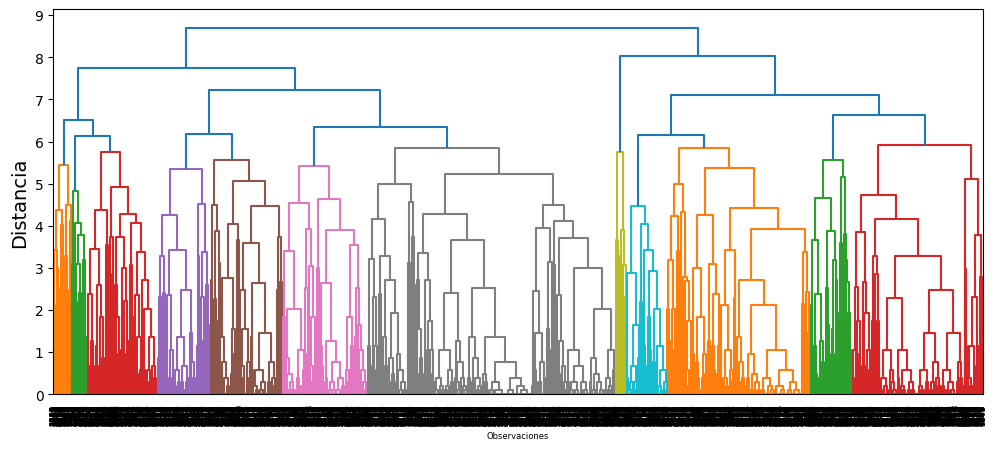

In [33]:
fig, ax = plt.subplots(figsize=(12, 5))
d = dendrogram(distances1, show_leaf_counts=True, leaf_font_size=6, ax=ax,labels=bank.index)
ax.set_xlabel('Observaciones', fontsize=6)
ax.set_yticks(np.arange(0, 10, 1))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()


In [34]:
distances2 = linkage(bank, method='complete', metric="euclidean")

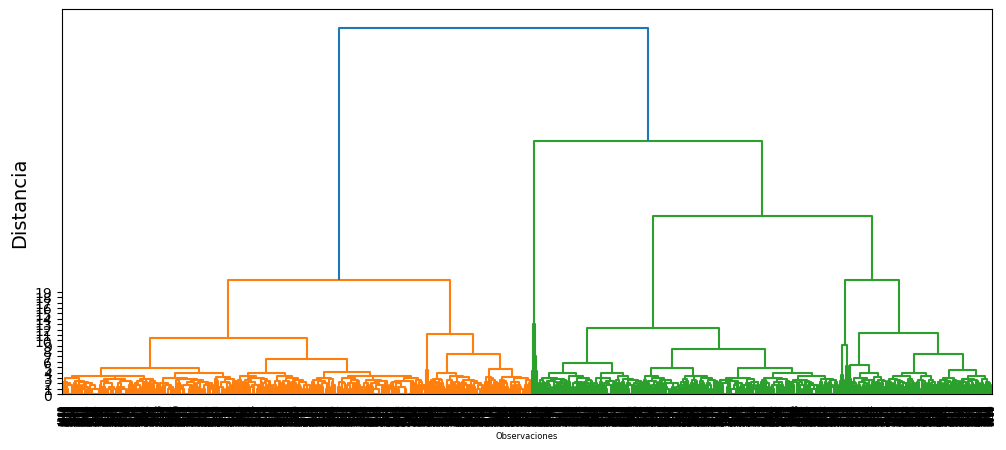

In [35]:


fig, ax = plt.subplots(figsize=(12, 5))
d = dendrogram(distances2, show_leaf_counts=True, leaf_font_size=6, ax=ax,labels=bank.index)
ax.set_xlabel('Observaciones', fontsize=6)
ax.set_yticks(np.arange(0, 20, 1))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()


In [36]:
distances3 = linkage(bank, method='complete', metric="cityblock")

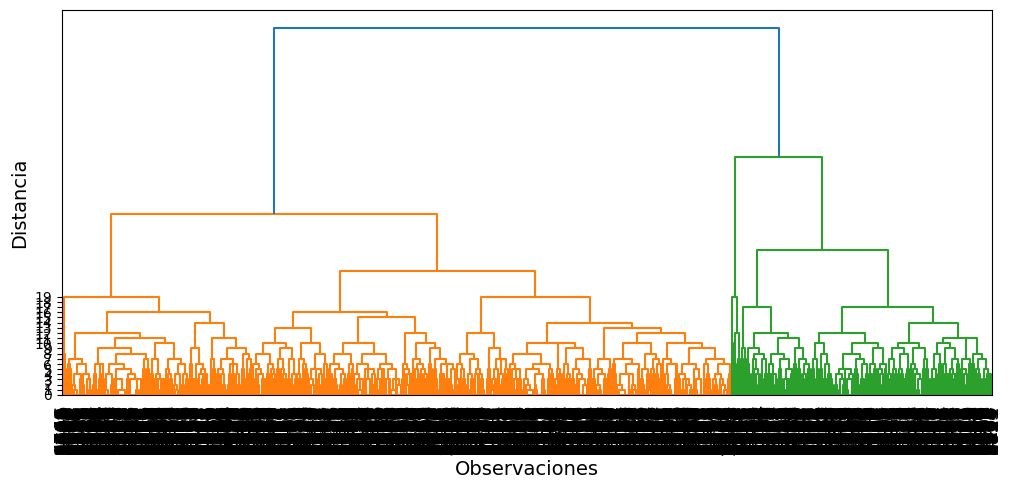

In [37]:

fig, ax = plt.subplots(figsize=(12, 5))
d = dendrogram(distances3, show_leaf_counts=True, leaf_font_size=14, ax=ax,labels=bank.index)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 20,1))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

## DBSCAN

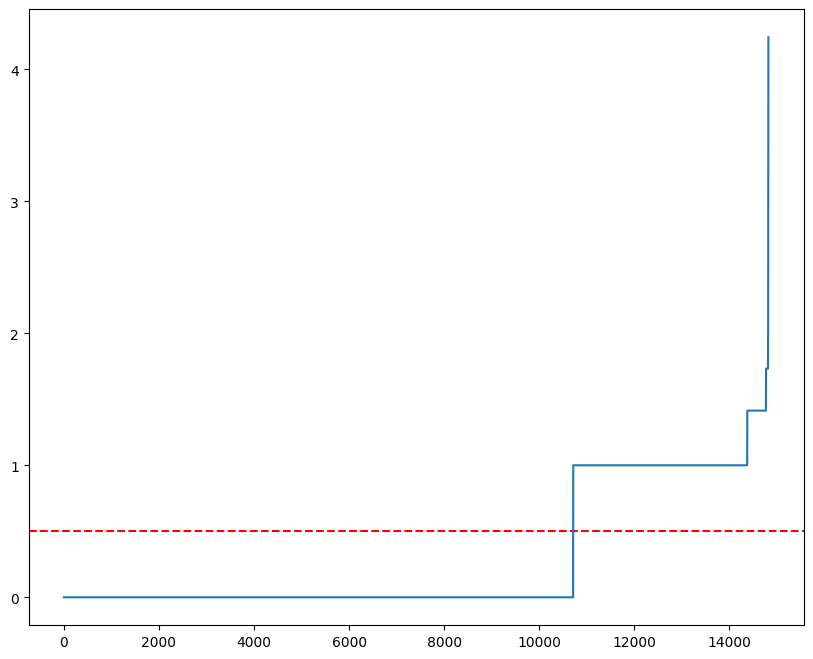

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 4)
nbrs = neigh.fit(bank)
distancias, indices = nbrs.kneighbors(bank)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

In [40]:
!pip install kneed

In [41]:
from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

1.0


In [42]:
db = DBSCAN(eps=1, min_samples=30)
clusters=db.fit_predict(bank)

In [43]:
bank['cluster_dbscan'] = clusters
bank.groupby('cluster_dbscan').mean()

,edad,empleo_cuello_blanco,empleo_cuello_azul,estado_civil_soltero,estado_civil_divorciado,educacion_primaria,educacion_secundaria,educacion_terciaria,hipoteca,prestamo
cluster_dbscan,,,,,,,,,,
-1,44.832913,0.331652,0.419294,0.255990,0.174653,0.311475,0.271122,0.351828,0.450820,0.214376
0,37.919811,0.038410,0.776954,0.258086,0.081536,0.040431,0.933962,0.002022,0.690027,0.133423
1,35.986742,0.935606,0.000000,0.314394,0.068182,0.000000,0.000000,0.990530,0.501894,0.092803
2,58.076923,0.092308,0.169231,0.000000,0.061538,0.000000,0.938462,0.000000,0.107692,0.030769
3,55.250000,0.000000,0.937500,0.062500,0.125000,0.000000,0.875000,0.000000,1.000000,0.125000
4,45.269231,0.000000,1.000000,0.038462,0.115385,1.000000,0.000000,0.000000,0.615385,0.038462


# Referencias

- Leskovec, J., Rajaraman, A., & Ullman, J. D. (2020). Mining of massive data sets. Cambridge university press.
- Sheehan, D. (2022). https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- Waggoner, P. Unsupervised Machine Learning for Clustering in Political and Social Research. Mimeo